In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [4]:
#Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). 
#EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('letters')
#train_images.shape #Train images set
#train_labels.shape
#for i in range(len(train_labels)):
 #   train_labels[i] = train_labels[i] - 1
print(train_labels)

[23  7 16 ... 13 15 19]


In [5]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('letters')
#test_images.shape #Test images set
#test_labels.shape

#for i in range(len(test_labels)):
 #   test_labels[i] = test_labels[i] - 1
print(test_labels)

[ 1  1  1 ... 26 26 26]


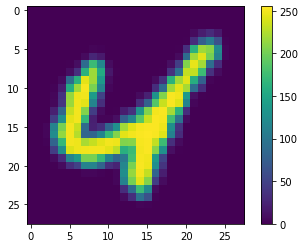

In [6]:
#Showing a picture of a certain element in the image training set
plt.figure()
plt.imshow(train_images[13])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#The output and the corresponding 26 classes
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
               'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print (len(class_names))

26


In [8]:
#Feature scaling for each element in the 2D array/picture. Each pixel is a value of 255, so we scale them to a scale of 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

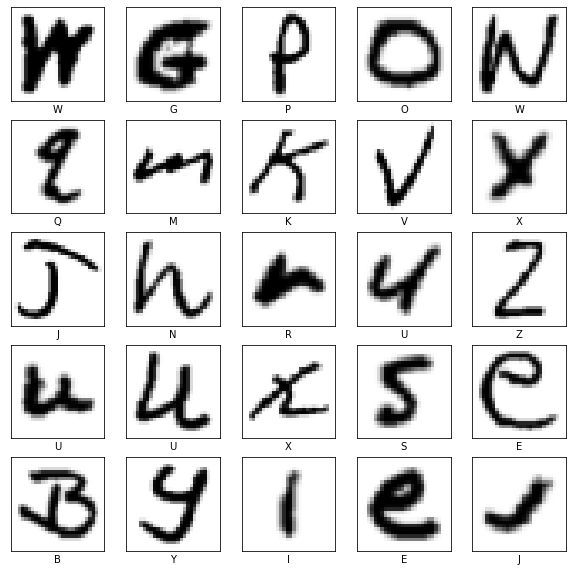

In [9]:
#Showing the first 25 training images in the set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]-1])
plt.show()

In [10]:
Ni = train_images.shape[1]*train_images.shape[2] #Number of neurons in the input layer
No = len(class_names) #Number of neurons in the input layer
Ns = train_images.shape[0] #Number of samples in the training data set
a = 2 #Scaling factor, arbitrary
Nh = Ns/(a*(No+Ni)) #Rule of thumb according to  http://hagan.okstate.edu/NNDesign.pdf#page=469
print(round(Nh))

77


In [11]:
#Creating the neural networks with 1 hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Flattening the 2D arrays into a 1D arrays with 28x28 elements - Input layer
    keras.layers.Dense(Nh, activation='relu'),
    keras.layers.Dense(26) #Output layers with 26 classes
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
train_labels1 = list()
for i in range(len(train_labels)):
    train_labels1.append(train_labels[i] - 1.0)

In [19]:
model.fit(train_images, train_labels-1, epochs=10)

Epoch 1/10
3900/3900 [==============================] - 9s 2ms/step - loss: 0.8233 - accuracy: 0.7600
Epoch 2/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.4977 - accuracy: 0.8490
Epoch 3/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.4245 - accuracy: 0.8699
Epoch 4/10
3900/3900 [==============================] - 9s 2ms/step - loss: 0.3884 - accuracy: 0.8795
Epoch 5/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.3647 - accuracy: 0.8863
Epoch 6/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.3470 - accuracy: 0.8907
Epoch 7/10
3900/3900 [==============================] - 9s 2ms/step - loss: 0.3339 - accuracy: 0.8939
Epoch 8/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.3231 - accuracy: 0.8966
Epoch 9/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.3145 - accuracy: 0.8999
Epoch 10/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.306

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels-1, verbose=2)

print('\nTest accuracy:', test_acc)

650/650 - 1s - loss: 0.4037 - accuracy: 0.8797

Test accuracy: 0.8796634674072266


In [36]:
#Assess the probability of falling into each class for an individual observation
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
index = 10400

In [37]:
print(predictions[index])
print("The letter is labeled: ", test_labels[index]-1)
print("The letter is predicted to be: ", np.argmax(predictions[index]))

[1.20209850e-04 8.86245061e-07 3.60016128e-09 3.83833935e-07
 6.36084685e-10 1.34349920e-10 8.31409164e-09 1.04389732e-08
 2.01715106e-17 4.08648028e-16 9.91656410e-12 6.37461817e-18
 2.39287547e-04 9.99523520e-01 7.24076813e-07 6.65303332e-08
 3.55018663e-08 1.14909126e-04 3.18268063e-13 1.16406346e-11
 8.14993517e-10 1.48461741e-15 6.94412305e-10 1.32100155e-13
 1.01766208e-11 1.49221156e-11]
The letter is labeled:  13
The letter is predicted to be:  13
